In [20]:
import geopandas
import matplotlib.pyplot as plt
import sys
from shapely.geometry import Point, Polygon
sys.path.append("..")

from utils import get_dvc_dir

In [4]:
test_dir = get_dvc_dir("test")
africa = geopandas.read_file(test_dir / "afr_g2014_2013_0")

In [5]:
d = geopandas.read_file(test_dir / "mali_usaid_zois")

In [69]:
d['upper_bbox'] = d.geometry.bounds['maxy'] > 13
polygons = []
for is_upper in [True, False]:
    bounds = d[d['upper_bbox'] == is_upper].geometry.bounds
    minx, miny, maxx, maxy = bounds['minx'].min(), bounds['miny'].min(), bounds['maxx'].max(), bounds['maxy'].max()
    print(minx, miny, maxx, maxy)
    polygons.append(Polygon([[minx, miny], [maxx, miny], [maxx, maxy], [minx, maxy]]))
bboxes = geopandas.GeoDataFrame({'geometry': polygons})

-5.197335399999872 13.1527367220001 -1.9996060219999094 17.11443622600001
-8.34855327799994 10.36852747000006 -4.661010148999935 12.583134347000112


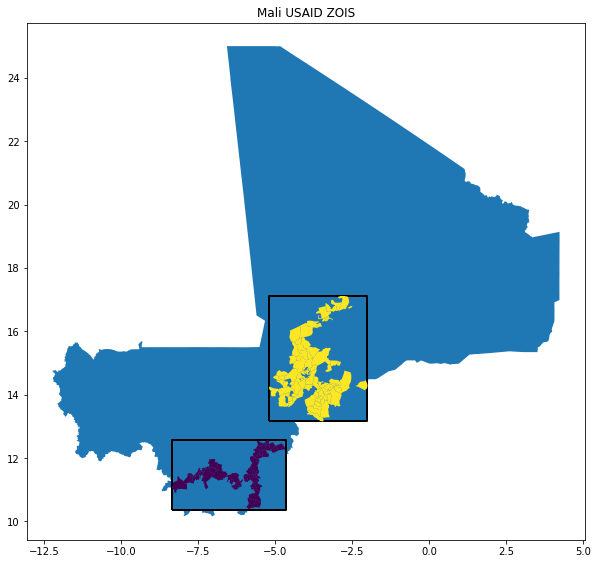

In [64]:
ax=africa[africa['ADM0_NAME'] == 'Mali'].plot(figsize=(10,10))
ax.set_title("Mali USAID ZOIS")
bboxes.plot(ax=ax, color=None, edgecolor='k',linewidth = 2,)
d.plot(
    ax=ax,  
    column="upper_bbox");